In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('marks.csv')

In [3]:
data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [4]:
data.shape

(100, 3)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1100x500 with 0 Axes>

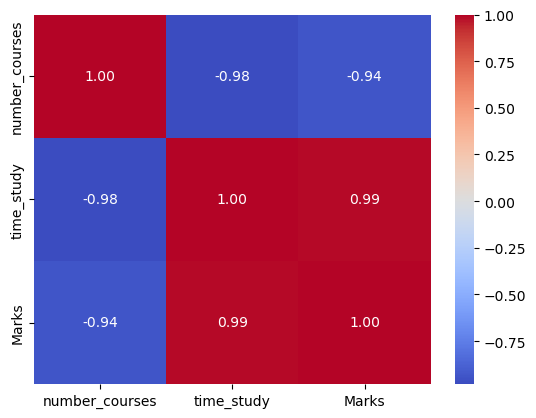

<Figure size 1100x500 with 0 Axes>

In [7]:
data=data.corr()
sns.heatmap(data, annot=True, fmt='.2f', cmap='coolwarm')
plt.figure(figsize=(11,5))

In [9]:
X=data.drop(columns='Marks')
Y=data['Marks']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3,random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
from sklearn.svm import SVR

In [43]:
model=SVR(C=2)
model.fit(X_train_scaled, Y_train)

SVR(C=2)

In [44]:
model.score(X_train_scaled, Y_train)

0.0

In [45]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
rmse

1.9329878313454092

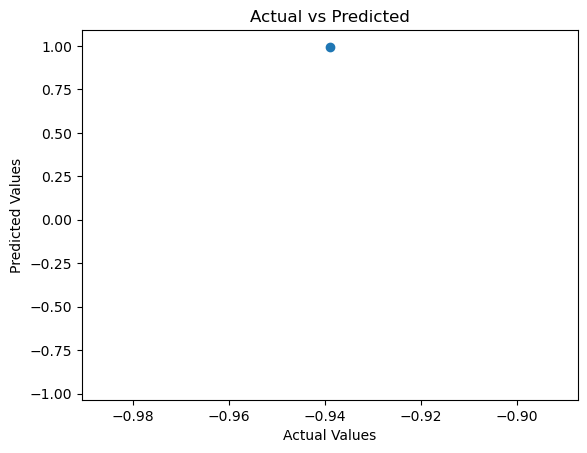

In [49]:
Y_pred=model.predict(X_test_scaled)
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  
plt.show()

In [50]:
data.head()

,number_courses,time_study,Marks
number_courses,1.000000,-0.980881,-0.939000
time_study,-0.980881,1.000000,0.987976
Marks,-0.939000,0.987976,1.000000
